In [18]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
from datetime import datetime

In [68]:
df = pd.read_csv('../data/aqar.csv')

In [72]:
df['timeBeforeRent'].value_counts()

0       4434
10        89
6         88
14        80
8         77
        ... 
149        1
102        1
1199       1
80         1
202        1
Name: timeBeforeRent, Length: 140, dtype: int64

In [76]:
df["onMarket"] = 0

In [19]:
datetime.now()

datetime.datetime(2022, 8, 16, 21, 53, 19, 48438)

In [23]:
td = (datetime.now() ) - (pd.to_datetime( row['create_time'][2:12] , format='%Y-%m-%d'))  
td = int(td /  np.timedelta64(1, 'D'))
td

11

In [77]:
for index , row in df.iterrows():
    if(row['timeBeforeRent'] == 0 ):
        td = int(((datetime.now() ) - (pd.to_datetime( row['create_time'][2:12] , format='%Y-%m-%d')))/np.timedelta64(1, 'D'))
        # # td = int(td )
        df['onMarket'][index] = td
    else:
        df['onMarket'][index] = df['timeBeforeRent'][index]

/tmp/ipykernel_18206/3402429901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = td
/tmp/ipykernel_18206/3402429901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = df['timeBeforeRent'][index]


<AxesSubplot:ylabel='Frequency'>

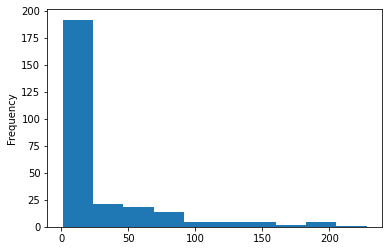

In [78]:
df['onMarket'].value_counts().plot(kind = 'hist')

In [79]:
df.to_csv('../data/aqar.csv')